In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use(['science', 'ieee', 'grid'])
from tqdm.auto import tqdm

In [2]:
# Simple Harmonic Oscillator
def p(rho,alpha):
    return (np.exp(-2*alpha*(rho**2)))*(alpha/np.pi)
def E(rho,alpha):
    return alpha + (rho**2)*(0.5-2*alpha**2)


In [3]:
alpha_list = np.arange(0, 1.6, 0.01)
energy_list = []

for alpha in tqdm(alpha_list):
    rho = 1
    step_size = 0.8
    rho_list = [rho]
    accep = 0
    rej = 0 

    for _ in range(10000):
        old_prob = p(rho, alpha)
        rho_new = rho + (2 * np.random.uniform() - 1) * step_size
        new_prob = p(rho_new, alpha)
        gamma = np.random.uniform()

        if gamma < min(1, new_prob / old_prob):
            rho = rho_new
            rho_list.append(rho)
            accep += 1
        else:
            rej += 1

    rho_list = np.array(rho_list)
    Energy = E(rho_list, alpha)
    av_energy = Energy.mean()
    energy_list.append(av_energy)

  0%|          | 0/160 [00:00<?, ?it/s]

C:\Users\hp\AppData\Local\Temp\ipykernel_17484\3019103117.py:17: RuntimeWarning: invalid value encountered in scalar divide
  if gamma < min(1, new_prob / old_prob):


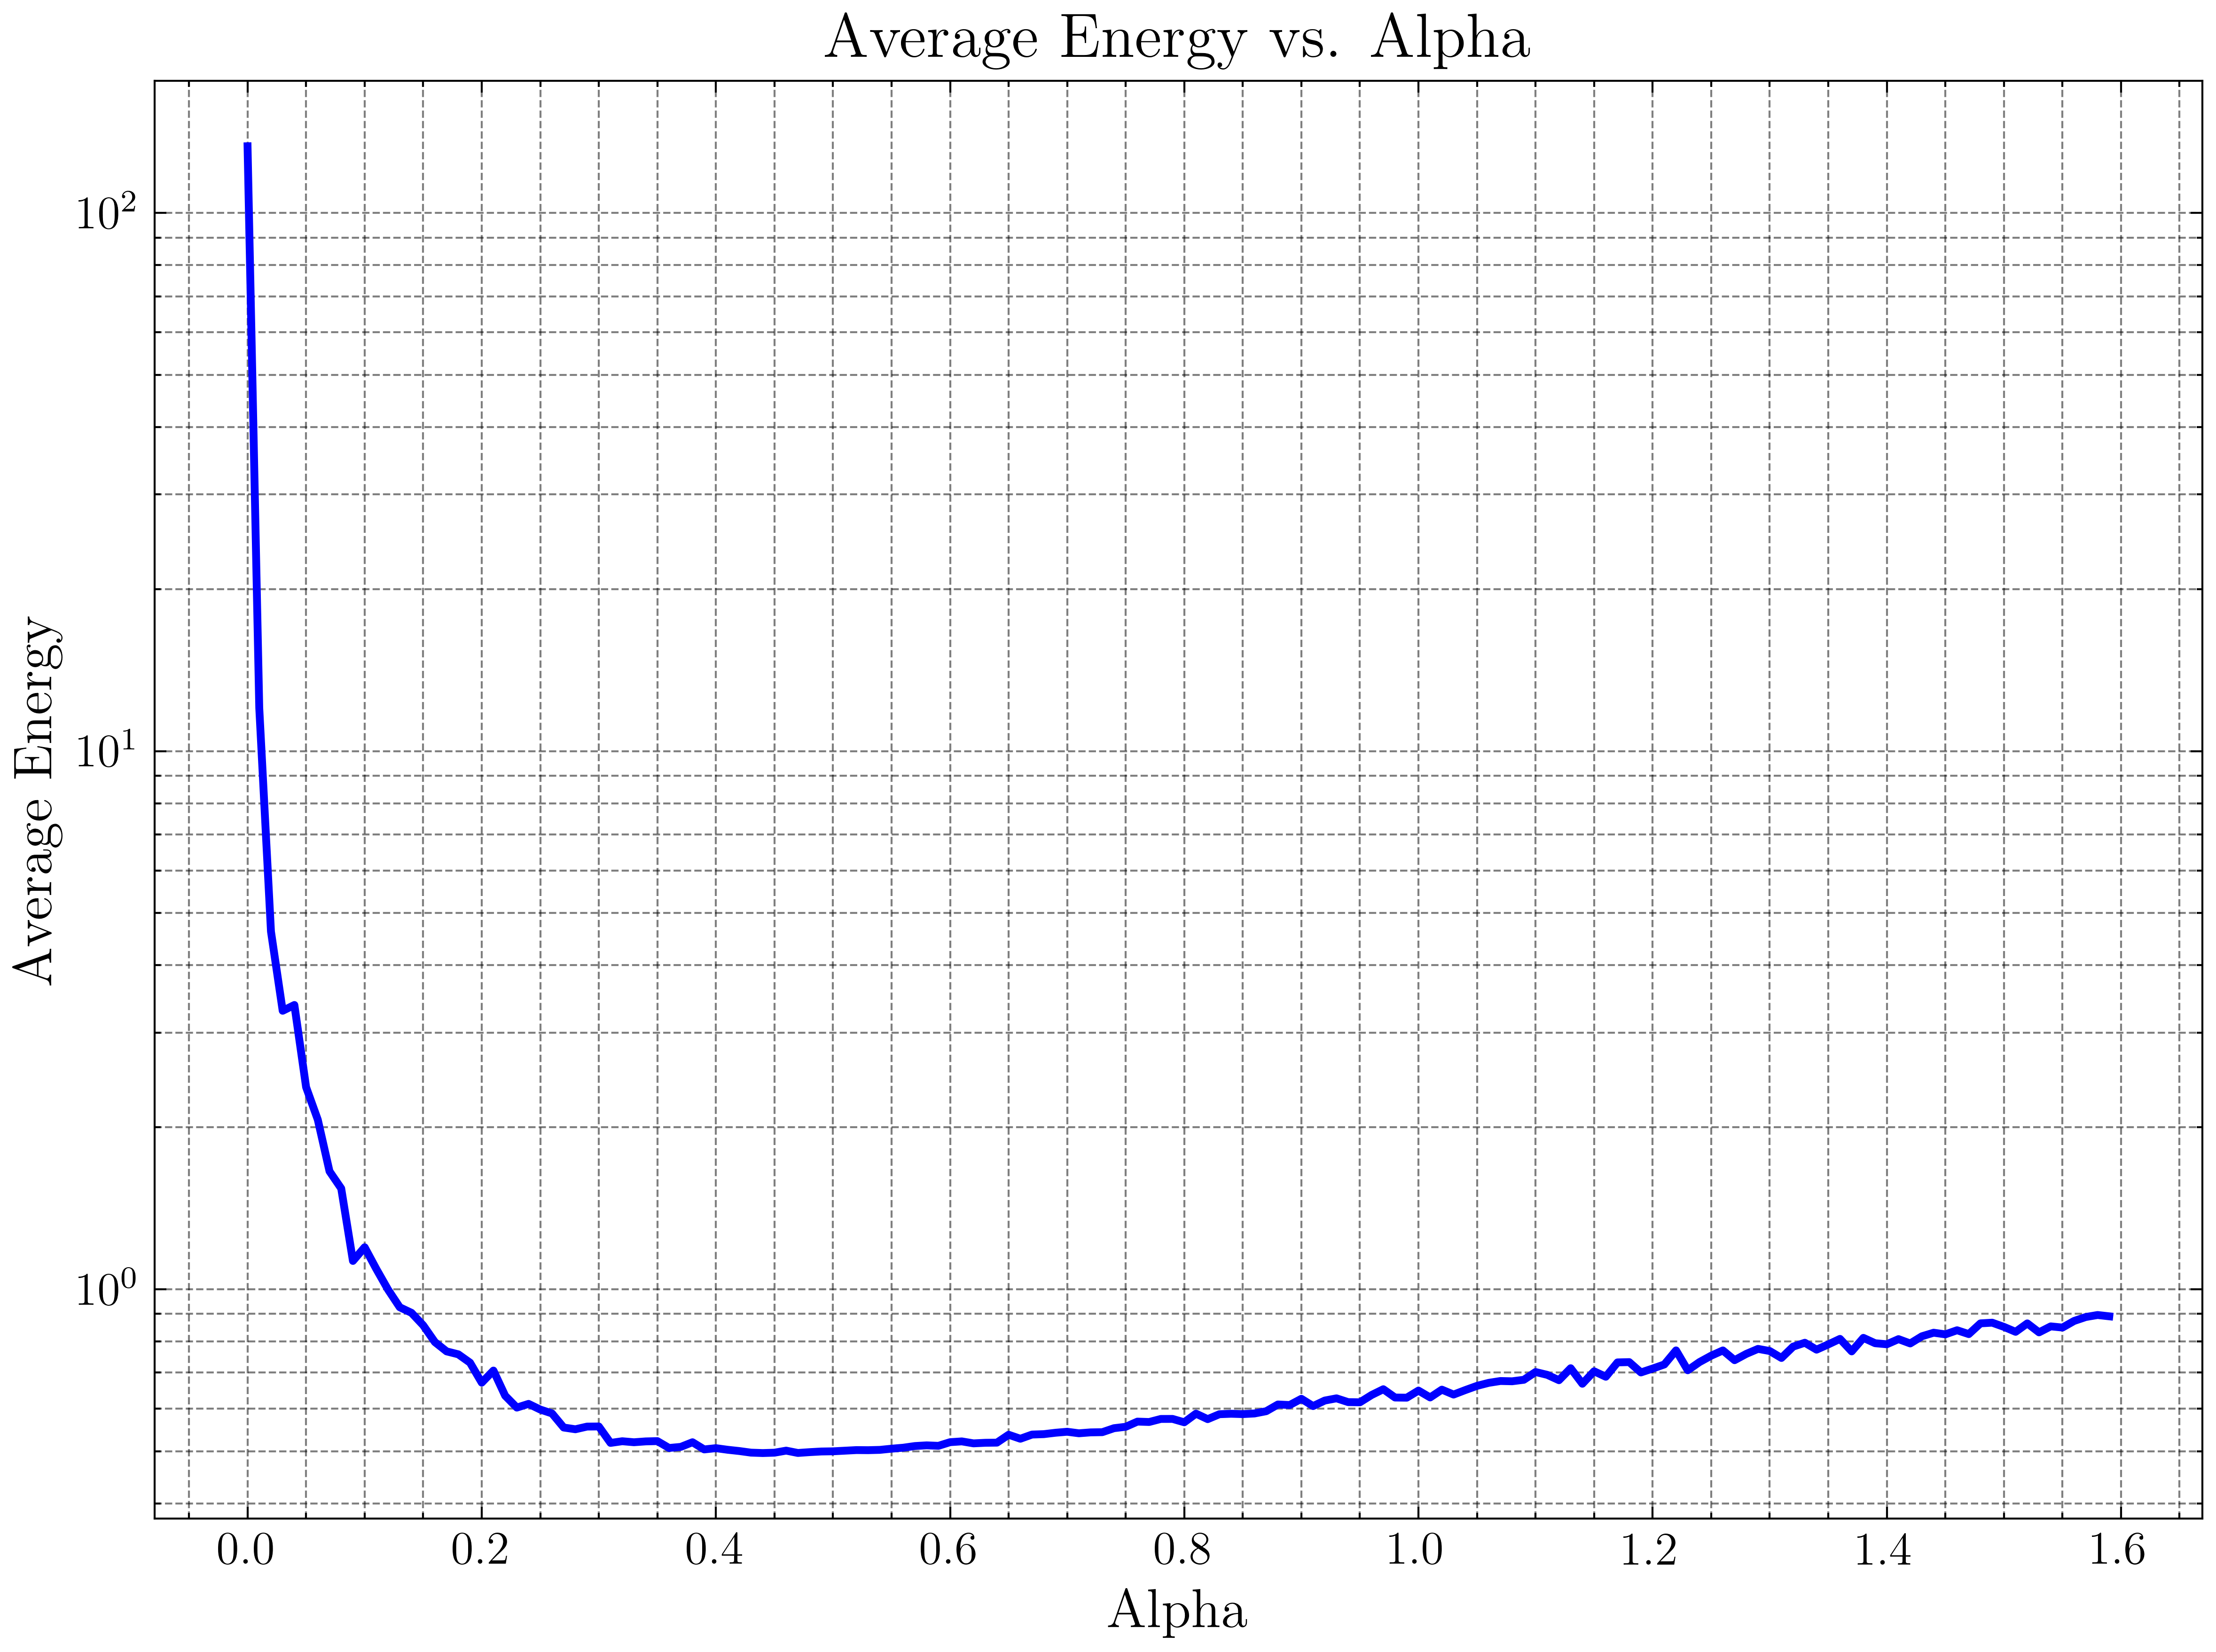

In [7]:
plt.figure(figsize=(8, 6))
plt.plot(alpha_list, energy_list, color='blue', linewidth=2, linestyle='-')
plt.yscale("log")
plt.xlabel('Alpha', fontsize=14)
plt.ylabel('Average Energy', fontsize=14)
plt.title('Average Energy vs. Alpha', fontsize=16)
plt.grid(True, which="both", ls="--", alpha=0.5)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

In [8]:
min_energy_index = np.argmin(energy_list)
min_energy = energy_list[min_energy_index]
corresponding_alpha = alpha_list[min_energy_index]

print("Minimum energy:", min_energy)
print("Corresponding alpha value:", corresponding_alpha)

Minimum energy: 0.4962899585463527
Corresponding alpha value: 0.44


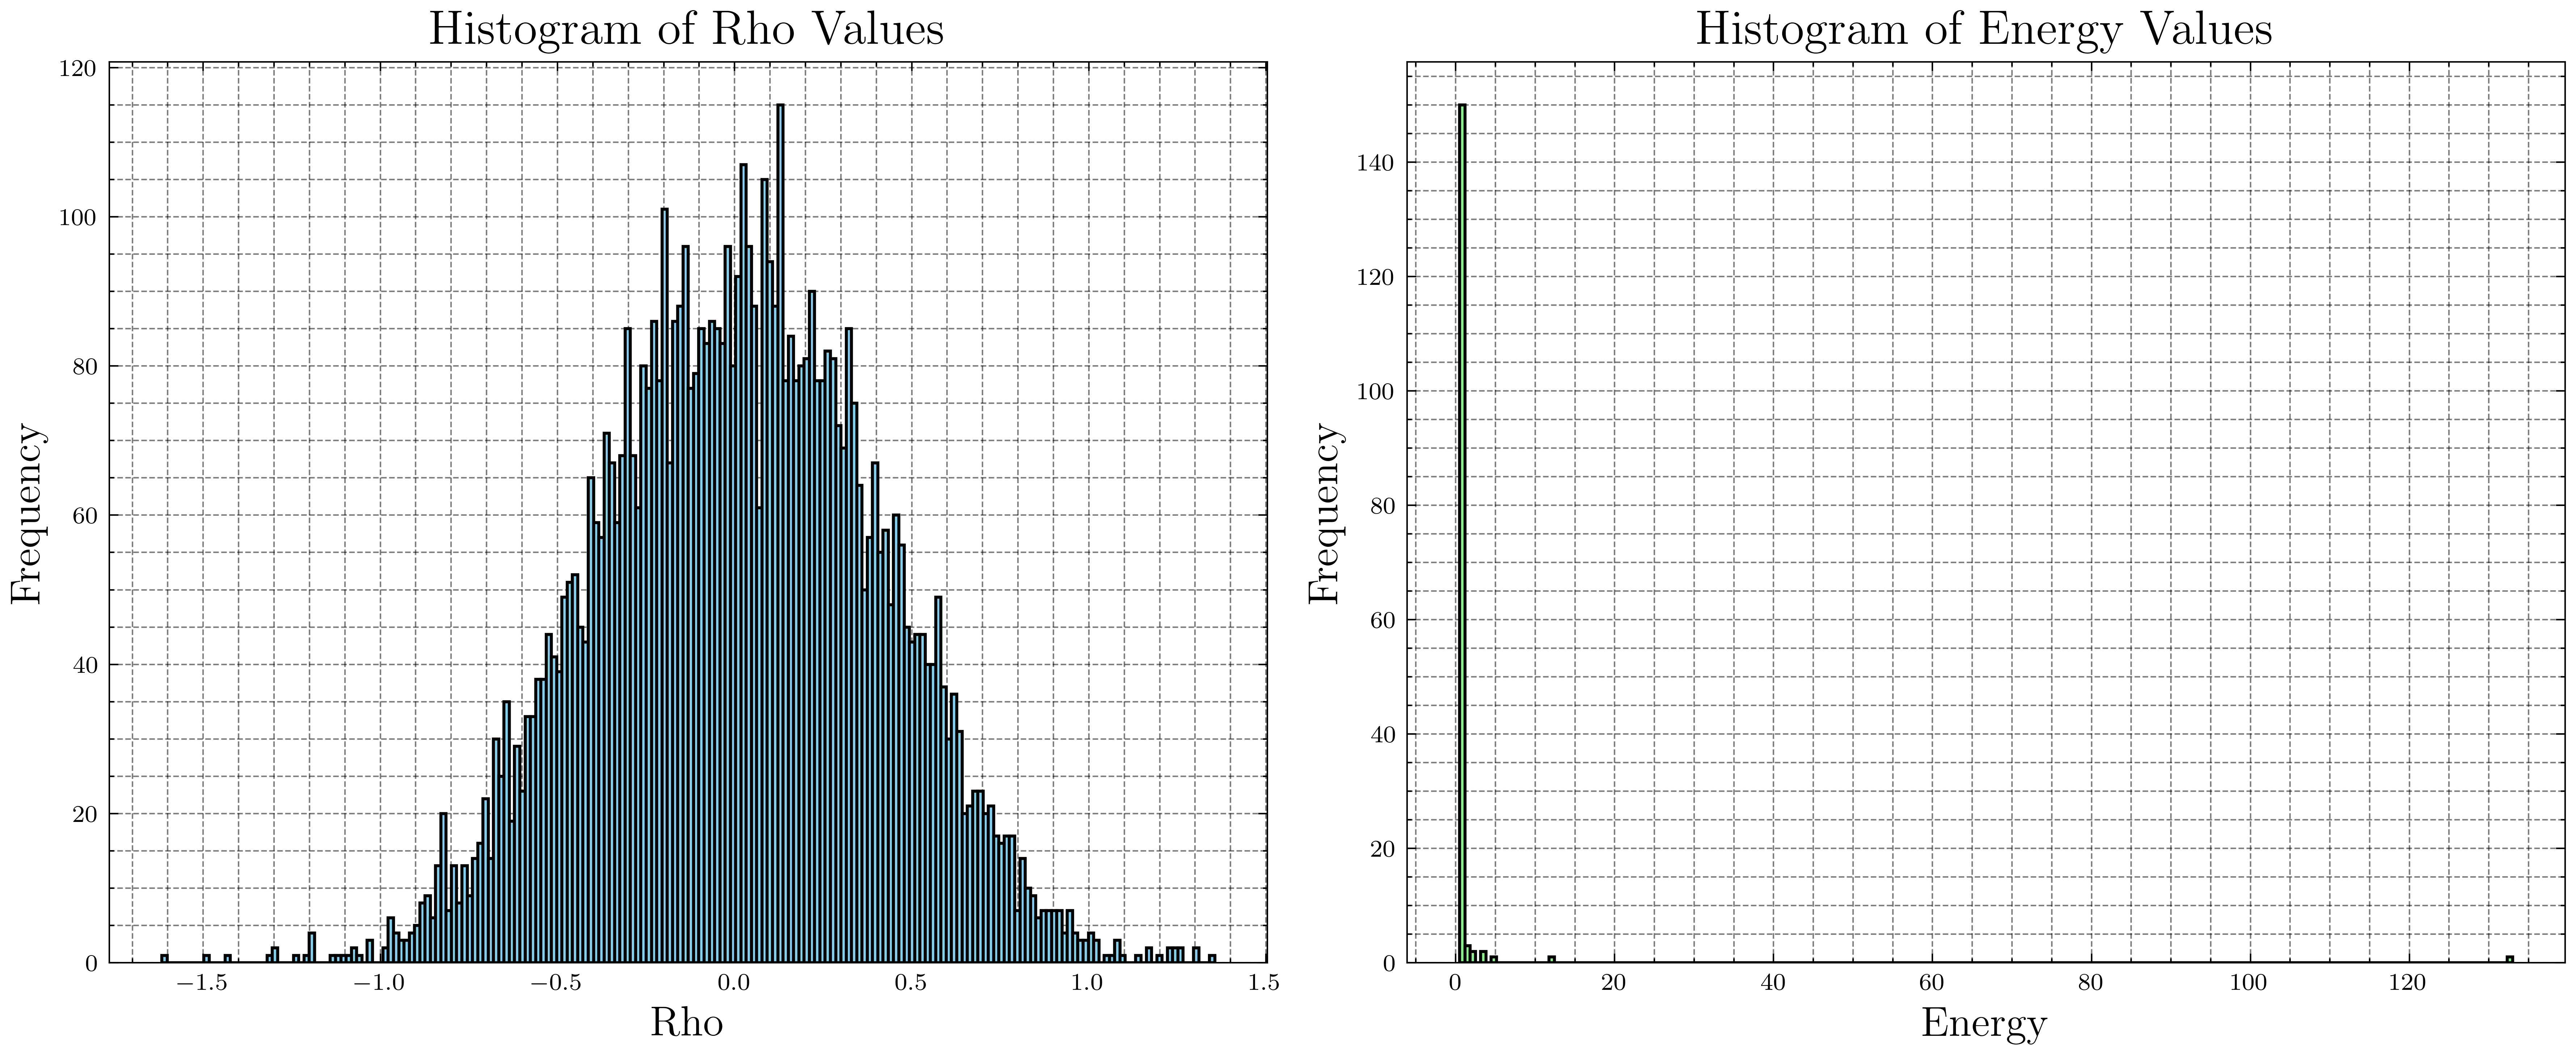

In [9]:
# Plotting histogram of rho_list
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)  # 1 row, 2 columns, first subplot
plt.hist(rho_list, bins=200, color='skyblue', edgecolor='black')
plt.xlabel('Rho', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Histogram of Rho Values', fontsize=16)
plt.grid(True, which="both", ls="--", alpha=0.5)

# Plotting histogram of energy_list
plt.subplot(1, 2, 2)  # 1 row, 2 columns, second subplot
plt.hist(energy_list, bins=200, color='lightgreen', edgecolor='black')
plt.xlabel('Energy', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Histogram of Energy Values', fontsize=16)
plt.grid(True, which="both", ls="--", alpha=0.5)

plt.tight_layout()
plt.show()